## Web Scrapping de "The Jungle Book"

In [137]:
# Importamos librerías necesarias

import requests # Nos permite hacer peticiones HTTP.
from bs4 import BeautifulSoup # Sirve para analizar y extraer información de documentos HTML o XML
from collections import Counter
import random
import re
import nltk
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud
from nltk.corpus import stopwords

In [138]:
# Guardamos la URL en variable "url"

url = "https://www.gutenberg.org/cache/epub/236/pg236-images.html"

In [139]:
# Petición al sitio web

contenido = requests.get(url).text

In [140]:
# Creamos el objeto BeautifulSoup para analizar el HTML

soup = BeautifulSoup(contenido, "html.parser")

In [142]:
# Buscamos todos los títulos <h1>

h1 = soup.find_all("h1")
print("El título del libro es: ", h1)

El título del libro es:  [<h1>THE JUNGLE BOOK</h1>]


In [151]:
# Buscamos todo el texto en cursiva (ej. pensamientos, nombres, etc.)

italicas = soup.find_all("i")
print("Textos en cursiva encontrados: \n", italicas)

Textos en cursiva encontrados: 
 [<i>Night-Song in the Jungle</i>, <i>Maxims of Baloo</i>, <i>dewanee</i>, <i>Brother, thy tail hangs down behind!</i>, <i>Brother, thy tail hangs down behind!</i>, <i>Brother, thy tail hangs down behind!</i>, <i>Then join our leaping lines that scumfish through the pines,<br/>
That rocket by where, light and high, the wild grape swings.<br/>
By the rubbish in our wake, and the noble noise we make,<br/>
Be sure, be sure, we’re going to do some splendid things!</i>, <i>Brother, the watch was long and cold.</i>, <i>Brother, he crops in the jungle still.</i>, <i>Brother, it ebbs from my flank and side.</i>, <i>Brother, I go to my lair—to die.</i>, <i>dhâk</i>, <i>Ow!</i>, <i>Ahoo!</i>, <i>Hsh!</i>, <i>Alala!</i>, <i>Ahae!</i>, <i>Seal Lullaby</i>, <i>The song of pleasant stations beside the salt lagoons,<br/>
The song of blowing squadrons that shuffled down the dunes,<br/>
The song of midnight dances that churned the sea to flame—<br/>
The Beaches of Lukann

In [154]:
# Convertimos los párafos en strings y contamos palabras clave

parrafos = str(soup.find_all("p"))
print("Veces que aparece 'Wolf': ", parrafos.count("Wolf"))
print("Veces que aparece 'Mowgli': ", parrafos.count("Mowgli"))
print("Veces que aparece 'Jungle': ", parrafos.count("Jungle"))

Veces que aparece 'Wolf':  71
Veces que aparece 'Mowgli':  224
Veces que aparece 'Jungle':  44


In [163]:
# Funcion para buscar palabras
def buscar_palabra(palabra):
  ocurrencias = str(soup).lower().count(palabra.lower())
  print(f"Encontraste la plabra '{palabra}' {ocurrencias} veces")

buscar_palabra("Mowgli")

Encontraste la plabra 'Mowgli' 229 veces


In [172]:
parrafo = soup.find_all("p")
parrafo_aleatorio = random.choice(parrafo).text.strip()
print("Elegimos párrafo aleatorio: \n ", parrafo_aleatorio)
print(" Cantidad de palabras en el párrafo: ", len(parrafo_aleatorio.split()))

Elegimos párrafo aleatorio: 
  Mowgli turned and saw the great Python’s head swaying a foot above his own.
 Cantidad de palabras en el párrafo:  14


In [173]:
# Descargamos las stopwords en inglés
nltk.download('stopwords')
stopwords_en = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [177]:
# Funcion para limpiar texto

def limpiar_texto(texto):
  texto_minuscula = texto.lower() # convierte todo el texto en minusculas
  texto_sin_puntuacion = re.sub(r'[^\w\s]', '', texto_minuscula) # elimina todos los signos de puntuacion
  lista_palabras = texto_sin_puntuacion.split() # divide el texto en palabras individuales
  palabras_importantes = [palabra for palabra in lista_palabras if palabra not in stopwords_en]
  return palabras_importantes

In [181]:
# Extramos el texto y lo limpiamos

texto_completo = soup.get_text()
palabras_limpias = limpiar_texto(texto_completo)
texto_limpio = ' '.join(palabras_limpias)

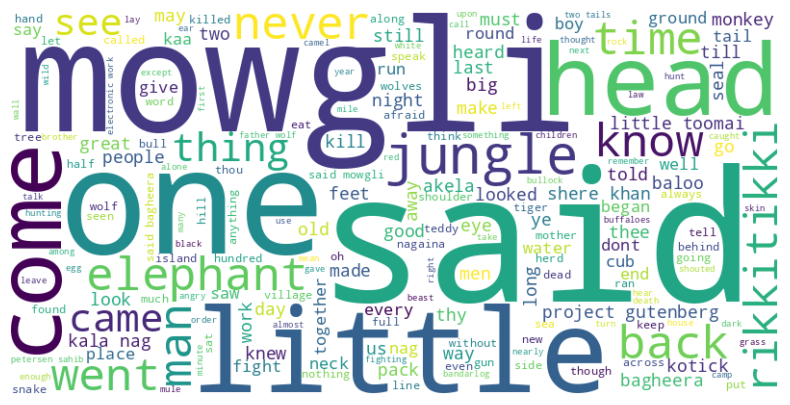

In [182]:
# Creamos y mostramos la nube de palabras (WordCloud)

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto_limpio)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

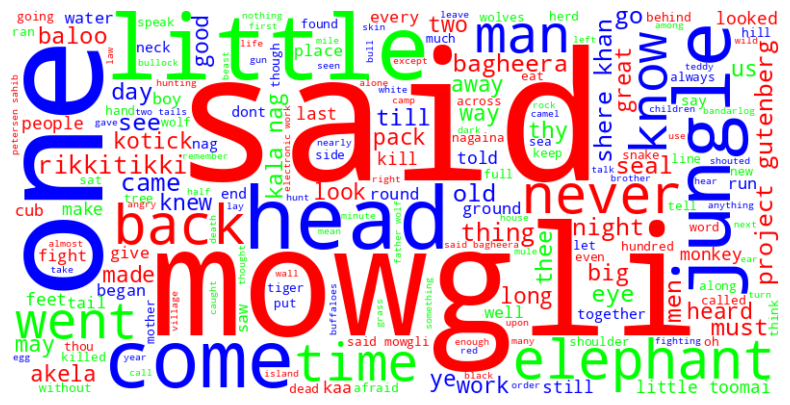

In [183]:
colores_personalizados = ['#FF0000', '#00FF00', '#0000FF']  # Rojo, verde, azul
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    color_func=lambda word, *args, **kwargs: random.choice(colores_personalizados)
).generate(texto_limpio)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## Limpieza con blacklist personalizada

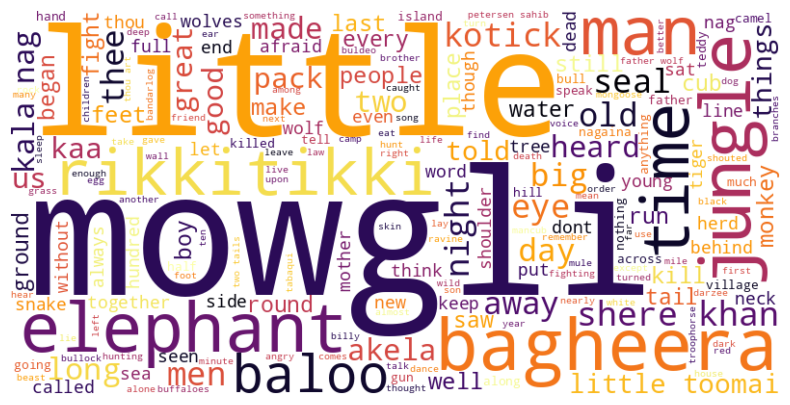

In [190]:
# Funcion para limpiar texto

def limpiar_texto_con_blacklist(texto):
  palabras_a_eliminar = [
      'said', 'one', 'thing', 'must', 'come', 'head', 'know',
      'back', 'never', 'give', 'knew', 'see', 'till', 'ye',
      'work', 'ran', 'came', 'thy', 'gutenberg', 'must', 'oh',
      'looked', 'look', 'found', 'say', 'went', 'may', 'way', 'go',
      ]

# Añexa las palabras que quiero eliminar a las stopwords

  black_list = stopwords_en.union(palabras_a_eliminar)
  texto_minuscula = texto.lower()
  texto_sin_puntuacion = re.sub(r'[^\w\s]', '', texto_minuscula)
  lista_palabras = texto_sin_puntuacion.split()
  palabras_filtradas = []

  for palabra in lista_palabras:
    if palabra not in black_list:
      palabras_filtradas.append(palabra)
  return palabras_filtradas

palabras_limpias = limpiar_texto_con_blacklist(texto_completo)
texto_limpio = ' '.join(palabras_limpias)

wordcloud = WordCloud(width=800, height=400, background_color="white", colormap = "inferno").generate(texto_limpio)

plt.figure(figsize=(20, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## Caso 2: Scraping en StackOverFlow

In [193]:
# URL de una pregunta en StarOverFlow

url_2 = "https://stackoverflow.com/questions/415511/how-to-get-the-current-time-in-python"
pagina = requests.get(url_2)
contenido = pagina.text
soup = BeautifulSoup(contenido, "html.parser")

In [195]:
# Extraemos el texto de la pregunta

pregunta = soup.find("div", {"class": "question"})
texto_pregunta = pregunta.find("div", {"class": "s-prose js-post-body"})
print("Pregunta: ", texto_pregunta.get_text().strip())

Pregunta:  How do I get the current time in Python?


In [196]:
# Extraemos la primera respuesta:

respuesta = soup.find("div", {"class": "answer"})
texto_respuesta = respuesta.find("div", {"class": "s-prose js-post-body"})
print("La respuesta es: ", texto_respuesta.get_text().strip())

La respuesta es:  Use datetime:
>>> import datetime
>>> now = datetime.datetime.now()
>>> now
datetime.datetime(2009, 1, 6, 15, 8, 24, 78915)
>>> print(now)
2009-01-06 15:08:24.789150

For just the clock time without the date:
>>> now.time()
datetime.time(15, 8, 24, 78915)
>>> print(now.time())
15:08:24.789150


To save typing, you can import the datetime object from the datetime module:
>>> from datetime import datetime

Then remove the prefix datetime. from all of the above.
